In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
pd.options.display.max_colwidth = 1000

In [3]:
sentences = ["The best Monty Python sketch is the one about the dead parrot,  I laughed so hard.",
             "I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!",
             "Chocolate is the best ice cream dessert topping, with a great taste.",
             "The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing.",
             "I would rather put strawberries on my ice cream for dessert, they have the best taste.",
             "The taste of caramel is a fantastic accompaniment to tasty mint ice cream."]

In [4]:
df = pd.DataFrame(sentences, columns = ['sentences'])

In [5]:
df

,sentences
0,"The best Monty Python sketch is the one about the dead parrot, I laughed so hard."
1,"I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!"
2,"Chocolate is the best ice cream dessert topping, with a great taste."
3,The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing.
4,"I would rather put strawberries on my ice cream for dessert, they have the best taste."
5,The taste of caramel is a fantastic accompaniment to tasty mint ice cream.


In [6]:
df['sentences'] = df['sentences'].str.replace("'s", '')
df['sentences'] = df['sentences'].str.replace(',', '')
df['sentences'] = df['sentences'].str.replace('.', '')
df['sentences'] = df['sentences'].str.replace(':', '')
df['sentences'] = df['sentences'].str.replace('!', '')
df['sentences'] = df['sentences'].str.replace('\'', '')
df['sentences'] = df['sentences'].str.lower()
df

,sentences
0,the best monty python sketch is the one about the dead parrot i laughed so hard
1,i laugh when i think about python ministry of silly walks sketch it is funny funny funny the best
2,chocolate is the best ice cream dessert topping with a great taste
3,the lumberjack song is the funniest monty python bit i cant think of it without laughing
4,i would rather put strawberries on my ice cream for dessert they have the best taste
5,the taste of caramel is a fantastic accompaniment to tasty mint ice cream


In [7]:
sentences = df['sentences'].tolist()

In [8]:
from nltk.corpus import stopwords  
stop_words = stopwords.words("english")

res = []
for text in sentences:
    r = ' '.join([word for word in text.split() if word not in stop_words]),
    res.append(r)
res

[('best monty python sketch one dead parrot laughed hard',),
 ('laugh think python ministry silly walks sketch funny funny funny best',),
 ('chocolate best ice cream dessert topping great taste',),
 ('lumberjack song funniest monty python bit cant think without laughing',),
 ('would rather put strawberries ice cream dessert best taste',),
 ('taste caramel fantastic accompaniment tasty mint ice cream',)]

In [9]:
df = pd.DataFrame(res, columns = ['sentences'])
df

,sentences
0,best monty python sketch one dead parrot laughed hard
1,laugh think python ministry silly walks sketch funny funny funny best
2,chocolate best ice cream dessert topping great taste
3,lumberjack song funniest monty python bit cant think without laughing
4,would rather put strawberries ice cream dessert best taste
5,taste caramel fantastic accompaniment tasty mint ice cream


In [10]:
df1 = pd.DataFrame([Counter(x) for x in df['sentences'].str.split()]).fillna(0).astype(int)

In [11]:
df1

,accompaniment,best,bit,cant,caramel,chocolate,cream,dead,dessert,fantastic,...,sketch,song,strawberries,taste,tasty,think,topping,walks,without,would
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
5,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [12]:
df2 = df1.transpose()

In [13]:
df2

,0,1,2,3,4,5
accompaniment,0,0,0,0,0,1
best,1,1,1,0,1,0
bit,0,0,0,1,0,0
cant,0,0,0,1,0,0
caramel,0,0,0,0,0,1
chocolate,0,0,1,0,0,0
cream,0,0,1,0,1,1
dead,1,0,0,0,0,0
dessert,0,0,1,0,1,0
fantastic,0,0,0,0,0,1


In [14]:
x = df2.astype(bool).sum(axis=1)
y = df2.sum(axis=1)
df2['df'] = x
df2['cf'] = y

In [15]:
df2

,0,1,2,3,4,5,df,cf
accompaniment,0,0,0,0,0,1,1,1
best,1,1,1,0,1,0,4,4
bit,0,0,0,1,0,0,1,1
cant,0,0,0,1,0,0,1,1
caramel,0,0,0,0,0,1,1,1
chocolate,0,0,1,0,0,0,1,1
cream,0,0,1,0,1,1,3,3
dead,1,0,0,0,0,0,1,1
dessert,0,0,1,0,1,0,2,2
fantastic,0,0,0,0,0,1,1,1


In [16]:
df2 = df2[df2['cf'] > 1]

In [17]:
df2['idf'] = np.log2(6/df2['df'])

C:\Users\jmfra\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
df2.idf = df2.idf.round(decimals=3)
df2

C:\Users\jmfra\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,0,1,2,3,4,5,df,cf,idf
best,1,1,1,0,1,0,4,4,0.585
cream,0,0,1,0,1,1,3,3,1.000
dessert,0,0,1,0,1,0,2,2,1.585
funny,0,3,0,0,0,0,1,3,2.585
ice,0,0,1,0,1,1,3,3,1.000
monty,1,0,0,1,0,0,2,2,1.585
python,1,1,0,1,0,0,3,3,1.000
sketch,1,1,0,0,0,0,2,2,1.585
taste,0,0,1,0,1,1,3,3,1.000
think,0,1,0,1,0,0,2,2,1.585


In [19]:
df3 = df2

In [20]:
df3[0] = df3[0] * df3['idf']
df3[1] = df3[1] * df3['idf']
df3[2] = df3[2] * df3['idf']
df3[3] = df3[3] * df3['idf']
df3[4] = df3[4] * df3['idf']
df3[5] = df3[5] * df3['idf']

C:\Users\jmfra\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\jmfra\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\jmfra\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [21]:
df3

,0,1,2,3,4,5,df,cf,idf
best,0.585,0.585,0.585,0.000,0.585,0.0,4,4,0.585
cream,0.000,0.000,1.000,0.000,1.000,1.0,3,3,1.000
dessert,0.000,0.000,1.585,0.000,1.585,0.0,2,2,1.585
funny,0.000,7.755,0.000,0.000,0.000,0.0,1,3,2.585
ice,0.000,0.000,1.000,0.000,1.000,1.0,3,3,1.000
monty,1.585,0.000,0.000,1.585,0.000,0.0,2,2,1.585
python,1.000,1.000,0.000,1.000,0.000,0.0,3,3,1.000
sketch,1.585,1.585,0.000,0.000,0.000,0.0,2,2,1.585
taste,0.000,0.000,1.000,0.000,1.000,1.0,3,3,1.000
think,0.000,1.585,0.000,1.585,0.000,0.0,2,2,1.585


In [22]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
import re
from sklearn.model_selection import train_test_split

#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\jmfra\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [23]:
>>> import nltk
>>> nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 1948
Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'present': 0.701423210857947, 'minutes': 0.7127450310382584}


In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 45.179041750568196
Component 0:
" Oh !    0.99929
" Oh !    0.99929
" Oh !    0.99929
" Oh !    0.99929
" Oh !    0.99929
" Oh !    0.99929
" Oh !    0.99929
" Oh !    0.99929
" Oh !    0.99929
" Oh !    0.99929
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.635269
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.579900
" You are right , Mrs . Weston ," said Mr . Knightley warmly , " Miss Fairfax is as capable as any of us of forming a just opinion of Mrs . Elton .                         0.561391
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I think it a bad thi

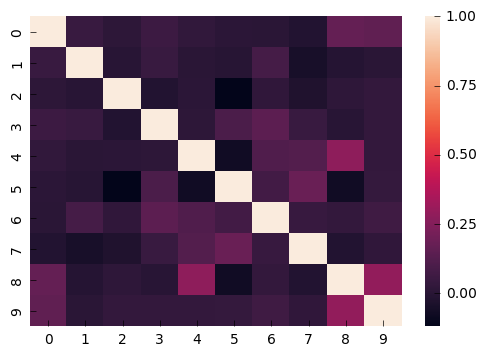

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

In [27]:
import seaborn as sns
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


# Drill 0: Test set

Now it's your turn: Apply our LSA model to the test set.  Does it identify similar sentences for components 0 through 4? 

In [28]:
X_test_lsa = lsa.fit_transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 49.36500882042625
Component 0:
" Oh !         0.999918
" Oh !         0.999918
" Oh !         0.999918
" Oh !"        0.999918
" Me ! oh !    0.999918
" Oh !         0.999918
" Oh !         0.999918
" Oh !         0.999918
" Oh !         0.999918
" Oh !         0.999918
Name: 0, dtype: float64
Component 1:
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                                                                                                                                                                                                                             0.613154
After tea , Mr . and Mrs . Weston , and Mr . Elton sat down with Mr . Woodhouse to cards .                                                                                                               

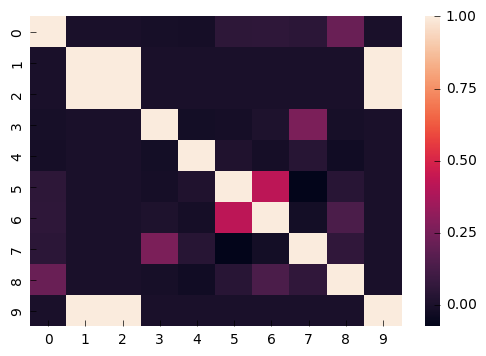

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .
5 " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
6 " And here is Mrs . Weston and Mr . Frank Churchill too ! Quite delightful ; so many friends !"
7 " You may well class the delight , the honour , and the comfo

In [29]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_test).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

## Drill 1: Tweaking tf-idf
Go back up to the code where we originally translated the text from words to numbers. There are a lot of decision-points here, from the stop list to the thresholds for inclusion and exclusion, and many others as well. We also didn't integrate spaCy, and so don't have info on lemmas or Named Entities. Change things up a few times and see how that affects the results of the LSA. Write up your observations and share them with your mentor.

In [30]:
vectorizer = TfidfVectorizer(max_df=0.75, # drop words that occur in more than half the paragraphs
                             min_df=3, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 1358
Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'present': 0.701423210857947, 'minutes': 0.7127450310382584}


In [31]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 48.45133510759293
Component 0:
" Oh !    0.999234
" Oh !    0.999234
Oh !      0.999234
" Oh !    0.999234
" Oh !    0.999234
" Oh !    0.999234
" Oh !    0.999234
" Oh !    0.999234
" Oh !    0.999234
" Oh !    0.999234
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.676258
" There were misunderstandings between them , Emma ; he said so expressly .                                                                                                 0.595110
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.588450
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I think it 

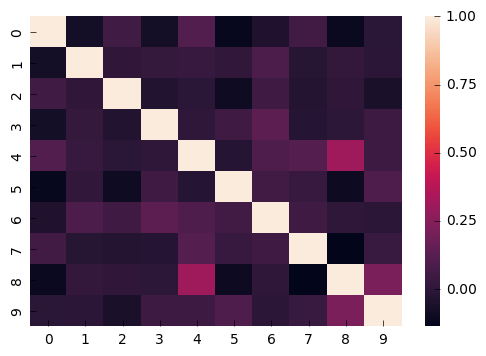

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

In [32]:
import seaborn as sns
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


It seems the important sentences didnt change that much and the overall accuracies of the model are very similar